## Prerequisites 
먼저 학습에 사용될 Library를 설치합니다.

In [ ]:
!apt install xvfb
!pip install pyvirtualdisplay
!pip install numpy
!pip install gym==0.22.* pygame

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.10).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
  Using cached gym-0.22.0.tar.gz (631 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 21.8 MB 1.2 MB/s 
  Created wheel for gym: filename=gym-0.22.0-py3-none-any.whl size=708393 sha256=24caa2dcc289bef8b5d931f71f8a10defb6fc420e33246a0bb8d45229f72605d
  Stored in directory: /root/.cache/pip/wheels/7d/5e/87/7d50e0179edda70feff5bba05c381041e1c1fd80c6b06a4cc3
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.17.3
    Uninstalling gym-0.17.3:
      Successfully uninstalled gym-0.17.3


## Improt the dependencies 📚

Q Learning 실습에 사용할 Library를 불러옵니다.
- `Numpy` Q table을 만들고 저장합니다.
- `OpenAI Gym` FrozenLake 환경을 불러옵니다.
- `Random` 랜덤한 수를 생성합니다.


In [ ]:
import numpy as np
import gym
import random

from matplotlib import pyplot as plt
%matplotlib inline
from time import sleep
from IPython import display

# OpenAI Gym
OpenAI에서는 다양한 강화학습 알고리즘 코드나 환경들을 제공합니다.

OpenAI Gym은 강화학습 환경의 표준적인 Baseline을 제공합니다. 또한 여러가지 sample 환경들을 제공합니다.

이외에도 다양한 환경들이 gym style에 맟춰서 개발되므로 이에 맟춰서 코드를 작성해 하나의 알고리즘으로 다양한 환경에서 실험할 수 있습니다.

https://gym.openai.com/

# FrozenLake 🧊
FrozenLake 환경은 grid world에서 시작점에서 시작해 목표 지점까지 도착하는 것이 목표인 환경입니다. 

### State
FrozenLake는 4x4 환경에서 진행됩니다. Agent가 존재 할 수 있는 16가지 위치(0~15)
가 state가 됩니다.

### Action
FrozenLake의 Action은 상하좌우로 움직일 수 있습니다.
- 0: LEFT
- 1: DOWN
- 2: RIGHT
- 3: UP

### Reward
목적지에 도달하면 1점을, 이외에는 0점을 얻습니다.

이번 실습은 Gym FrozenLake 환경에서 진행합니다. 

본격적으로 시작하기 전에 FrozenLake-v0 환경에서 랜덤한 액션을 하는 에이전트를 실행시켜 봅시다.


먼저 환경 오브젝트를 생성합니다. gym.make(환경이름)을 사용합니다.

env.observation_space는 환경의 state와 관련된 정보를 가진 오브젝트입니다.

env.action_space는 환경의 action과 관련된 정보를 가진 오브젝트입니다. 

obsrvation_space = Discrete(16), 16
action_space = Discrete(4), 4
env.reset() = 0


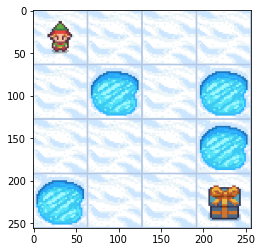

In [ ]:
env = gym.make("FrozenLake-v1", is_slippery=False)
env.reset()

print(f"obsrvation_space = {env.observation_space}, {env.observation_space.n}")

print(f"action_space = {env.action_space}, {env.action_space.n}")

print(f"env.reset() = {env.reset()}")

plt.imshow(env.render(mode='rgb_array'))    

`env.reset` 환경을 초기화하고 첫 state를 반환합니다.

`env.render` 환경을 visualize 해주는 함수입니다.

`env.action_space.sample` action_space의 랜덤한 action을 반환합니다. ( 여기서는 0~3사이의 랜덤한 정수 )


obs: 1
reward: 0.0
done: False
info: {'prob': 1.0}


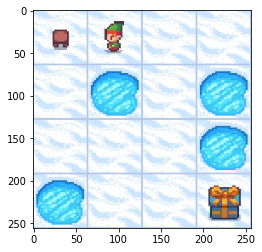

In [ ]:
obs, reward, done, info = env.step(0)
plt.imshow(env.render(mode='rgb_array')) 

print(f'obs: {obs}')
print(f'reward: {reward}')
print(f'done: {done}')
print(f'info: {info}')

`env.step(action)` 해당 action을 환경에서 실행하고, obs, reward, done, info값을 받아옵니다.

`obs(Observation)`는 다음 state를 나타냅니다. (State t+1)

`Reward`는 action을 통해 얻은 보상입니다.

`Done`은 현재 환경이 끝났는지 여부를 알려줍니다.

`Info`는 부가적인 정보를 담은 dict입니다. 대부분 학습에 사용되지 않습니다.

========= step 4 ==========
action: 2
obs: 5
reward: 0.0
done: True
info: {'prob': 1.0}


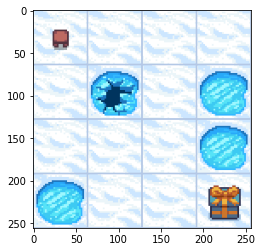

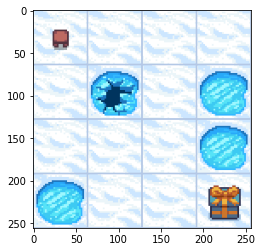

In [55]:
env = gym.make("FrozenLake-v1", is_slippery=False)

def random_episode(env):
    #env.reset() -> reset environment and returns the initial state
    state = env.reset()
    done = False
    step_count = 0
    while not done: #TODO
        #env.action_space.sample() -> returns random value within the action space
        action = env.action_space.sample()
        #env.step(action) -> do action in environment, returns next state, reward, done, and extra values
        observation, reward, done, info = env.step(action)
        state = observation

        display.clear_output(wait=True)
        print(f"========= step {step_count} ==========")
        print(f'action: {action}')
        print(f'obs: {observation}')
        print(f'reward: {reward}')
        print(f'done: {done}')
        print(f'info: {info}')
  
        plt.imshow(env.render(mode='rgb_array')) 
        display.display(plt.gcf())
        
        
        sleep(0.3)
        step_count += 1
        if step_count > 100:
            break

random_episode(env)

# Q Learning
다음으로는 모델을 알지 못해도 학습할 수 있는 model-free 방식인 q learning으로 학습하는 에이전트를 구현해 보겠습니다.


Q Table에는 해당 (state, action) 쌍에서의 quality를 뜻하는 값을 저장합니다.

이때 초기에는 1의 값을 갖고 다음과 같은 식에 의해 점차 update 됩니다.

$$ Q({\small state}, {\small action}) \leftarrow (1 - \alpha) Q({\small state}, {\small action}) + \alpha \Big({\small reward} + \gamma \max_{a} Q({\small next \ state}, {\small all \ actions})\Big) $$

Q Learning에서는 Agent의 Exploration을 위해 `epsilon-greedy policy`를 사용합니다.

epsilon의 확률로 랜덤한 행동을 하고, 아닐경우 q_table[state] 에서 가장 기댓값이 높은 액션을 하게 됩니다.

스켈레톤 코드에서 Q Learning을 구현해 봅시다

In [ ]:
#Create environment
env = gym.make("FrozenLake-v1", is_slippery=False)


# 0. Initialize Q table and parameters

#Algorithm parameters: step size alpha, small epsilon
epsilon = 0.1 # Exploration Percentatige
alpha = 0.1   # Learning Rate
gamma = 0.99  # Discount Rate

#Initialize Q(s, a), for all (s, a)
q_table = np.ones([env.observation_space.n, env.action_space.n]) #TODO


#Train function
def train(env, q_table, train_steps, target_score):
    #Values for debugging
    episode_num = 0
    reward_sum = 0
    total_steps = 0

    #Loop for each episode
    while total_steps < train_steps: #TODO
        #Print average score every 100 episode
        episode_num += 1
        if episode_num % 100 == 0:
            print(f'{episode_num} ep : {reward_sum / 100}')
            if target_score <= reward_sum / 100:
                break
            reward_sum = 0

        #Initialize S
        state = env.reset() #TODO
        done = False

        #Loop for each step of episode until S is terminal
        while not done: #TODO
            total_steps += 1

            # 1. Select action using epsillon-greedy
            #Choose A from S using policy derived from Q (e.g., epsilon-greedy)
            if random.random() > epsilon: #TODO
                #Best Action
                action = np.argmax(q_table[state]) #TODO
            else:
                #Random Action
                action = env.action_space.sample() #TODO

            # 2. Take action and get observation
            #Take action A, observe S', R, done
            next_state, reward, done, info = env.step(action) #TODO
            reward_sum += reward

            # 3. Update Q Table
            #Q(S, A) <- Q(S, A) + alpha*[R + gamma * (1-done) * max a Q(S', a) - Q(S, A)]
            #Q(S, A) <- (1 - alpha) Q(S, A) + alpha *[R + gamma * (1-done) * max a Q(S', a)]
            q_table[state][action] = (1 - alpha) * q_table[state][action] + alpha * (reward + gamma * (1-done) * np.max(q_table[next_state])) #TODO
            
            #S <- S'
            state = next_state #TODO

    #Print total steps to learn
    print(f'Total steps: {total_steps}')

#Run train
train(env, q_table, 100000, 0.8)

100 ep : 0.75
200 ep : 0.86
Total steps: 1852


Q Table을 visualize 하여 어떤 식으로 학습됐는지 확인해 봅시다.

In [ ]:
dirs = ['◁','▽','▷','△']
for row in range(4):
    line = ''
    for col in range(4):
        #Printing the direction of maximum Q value
        state = col+row*4
        if state in (5, 7, 11, 12):
            line += '●'
        elif state == 15:
            line += '★'
        else:
            line += dirs[np.argmax(q_table[state])] #TODO
    print(line)

▽▷▽▷
▽●▽●
▷▽▽●
●▷▷★


학습한 에이전트를 테스트 할 때에는 최선의 선택만을 하도록 합니다.

env.render을 통해 잘 학습되었는지 visualize합니다.

마지막으로 에피소드 100회 평균으로 평가해 봅니다.

100 episodes average =  1.0


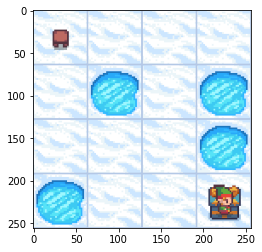

In [ ]:
def test(env, q_table, visualize=False, step_limit=300):
    state = env.reset()
    reward_sum = 0
    step_count = 0
    done = False
    while not done:
        step_count += 1
        if step_count > step_limit:
            break
        
        #No epsilon-greedy
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        reward_sum += reward
        if visualize:
            print(f"========= step {step_count} ==========")
            plt.imshow(env.render(mode='rgb_array'))
            display.display(plt.gcf())
            display.clear_output(wait=True)
            #env.render()
            sleep(0.2)

    return reward_sum

score_viz = test(env, q_table, visualize=True)
reward_tot = 0
for _ in range(100):
    reward_tot += test(env, q_table)
print("100 episodes average = ", reward_tot / 100)

# Slippery FrozenLake ⛄
같은 알고리즘을 Slippery FrozenLake에서 돌려봅시다.

`is_slippery=True`로 한 FrozenLake는 이동 방향의 좌우로 미끄러질 수 있습니다.

예를 들어 action이 left 이동일 경우
- P(move left) = 1/3
- P(move up) = 1/3
- P(move down) = 1/3

의 확률로 action이 결정되게 됩니다.

기존 환경보다 어려운 non-deterministic한 환경입니다.

목표 점수를 0.45로 낮추어서 학습합니다.

In [ ]:
#Create environment
env = gym.make("FrozenLake-v1", is_slippery=True)
q_table = np.ones([env.observation_space.n, env.action_space.n])
train(env, q_table, 200000, 0.45)

100 ep : 0.14
200 ep : 0.27
300 ep : 0.27
400 ep : 0.41
500 ep : 0.38
600 ep : 0.33
700 ep : 0.36
800 ep : 0.28
900 ep : 0.37
1000 ep : 0.33
1100 ep : 0.34
1200 ep : 0.35
1300 ep : 0.34
1400 ep : 0.43
1500 ep : 0.39
1600 ep : 0.39
1700 ep : 0.44
1800 ep : 0.35
1900 ep : 0.34
2000 ep : 0.32
2100 ep : 0.39
2200 ep : 0.39
2300 ep : 0.29
2400 ep : 0.4
2500 ep : 0.32
2600 ep : 0.3
2700 ep : 0.4
2800 ep : 0.37
2900 ep : 0.36
3000 ep : 0.3
3100 ep : 0.37
3200 ep : 0.37
3300 ep : 0.46
Total steps: 101187


In [ ]:
reward_tot = 0
for _ in range(100):
    reward_tot += test(env, q_table)
print(reward_tot / 100)

0.76


Q Table을 visualize 하여 어떤 식으로 학습됐는지 확인해 봅시다.

주변 구멍의 반대 방향으로 이동하도록 학습된 모습을 확인할 수 있습니다.

In [ ]:
dirs = ['◁','▽','▷','△']
for row in range(4):
    line = ''
    for col in range(4):
        #Printing the direction of maximum Q value
        state = col+row*4
        if state in (5, 7, 11, 12):
            line += '●'
        elif state == 15:
            line += '★'
        else:
            line += dirs[np.argmax(q_table[state])] #TODO
    print(line)

◁△△△
◁●◁●
△▽◁●
●▷▽★


1.0


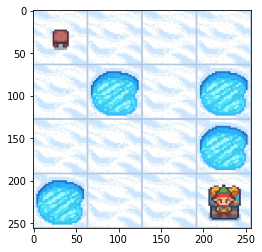

In [ ]:
#Visualize trained agent
score_viz = test(env, q_table, visualize=True)
print(score_viz)